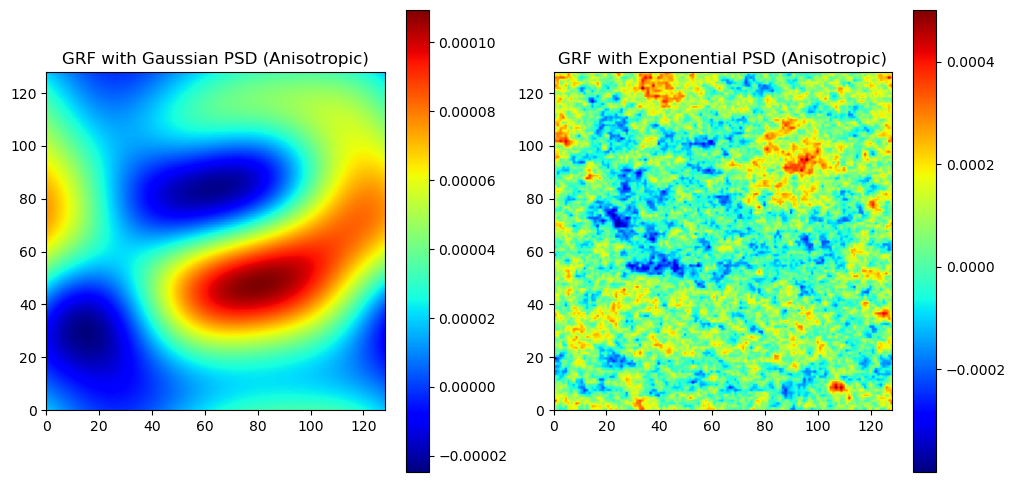

In [68]:
import numpy as np
import matplotlib.pyplot as plt

def Gaussian_psd(freq_grid_x, freq_grid_y, length_scale_x=1.0, length_scale_y=1.0, sigma=1.0):
    return sigma**2 * np.exp(-2 * np.pi**2 * (length_scale_x**2 * freq_grid_x**2 + length_scale_y**2 * freq_grid_y**2))

def exponential_psd(freq_grid_x, freq_grid_y, length_scale_x=1.0, length_scale_y=1.0, sigma=1.0):
    return sigma**2 / (1 + 4 * np.pi**2 * (length_scale_x**2 * freq_grid_x**2 + length_scale_y**2 * freq_grid_y**2))

def generate_grf(psd_function, grid_size):
    # Create frequency grid
    freq_x = np.fft.fftfreq(grid_size, d=1/grid_size)
    freq_y = np.fft.fftfreq(grid_size, d=1/grid_size)
    freq_grid_x, freq_grid_y = np.meshgrid(freq_x, freq_y)

    # Calculate power spectral density
    psd = psd_function(freq_grid_x, freq_grid_y)

    # Generate random field in frequency domain
    random_field_freq_domain = np.random.normal(size=(grid_size, grid_size)) + 1j * np.random.normal(size=(grid_size, grid_size))
    random_field_freq_domain *= np.sqrt(psd)

    # Inverse FFT to transform to spatial domain
    random_field = np.fft.ifft2(random_field_freq_domain)
    return np.real(random_field)

# Grid size
grid_size = 128
sigma=0.5
# Length scales in x and y directions
length_scale_x, length_scale_y = 0.25, 0.2

# Generate GRF using Gaussian PSD with different length scales
grf_gaussian = generate_grf(lambda x, y: Gaussian_psd(x, y, length_scale_x, length_scale_y,sigma), grid_size)

# Generate GRF using Exponential PSD with different length scales
grf_exponential = generate_grf(lambda x, y: exponential_psd(x, y, length_scale_x, length_scale_y,sigma), grid_size)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(grf_gaussian, extent=(0, grid_size, 0, grid_size), cmap='jet')
plt.title('GRF with Gaussian PSD (Anisotropic)')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(grf_exponential, extent=(0, grid_size, 0, grid_size), cmap='jet')
plt.title('GRF with Exponential PSD (Anisotropic)')
plt.colorbar()

plt.show()


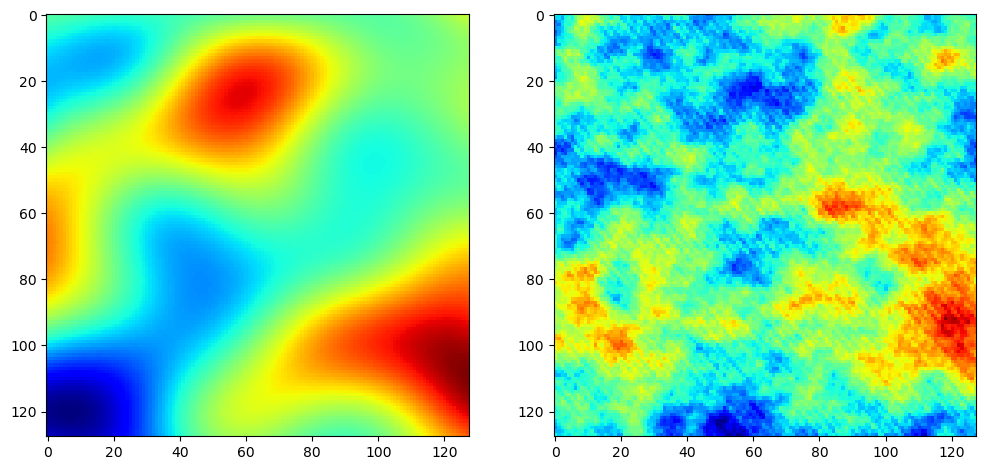

In [67]:
import gstools as gs
grid_size = 128
x = y = range(grid_size)
len_scale = [0.2, 0.25]
gau_model = gs.Gaussian(dim=2, var=1, len_scale=[x*grid_size for x in len_scale])
gau_srf = gs.SRF(gau_model, seed=20170519)

gau_field = gau_srf.structured([x, y])
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(gau_field, cmap='jet')

exp_model = gs.Exponential(dim=2, var=1, len_scale=[x*grid_size for x in len_scale])
exp_srf = gs.SRF(exp_model, seed=20170519)

exp_field = exp_srf.structured([x, y])
plt.subplot(1, 2, 2)
plt.imshow(exp_field, cmap='jet')

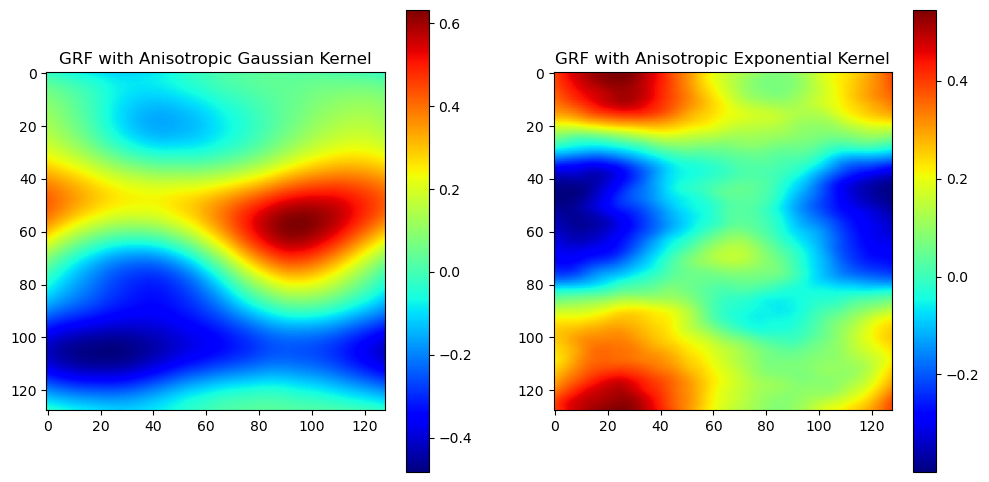

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_kernel(X, length_scale_x=1.0, length_scale_y=1.0, sigma=1.0):
    """Anisotropic Gaussian kernel."""
    X_scaled = X / np.array([length_scale_x, length_scale_y])
    sq_dists = np.sum(X_scaled**2, axis=1, keepdims=True)
    return sigma**2*np.exp(-0.5*sq_dists)

def exponential_kernel(X, length_scale_x=1.0, length_scale_y=1.0,sigma=1.0):
    """Anisotropic Exponential kernel."""
    X_scaled = X / np.array([length_scale_x, length_scale_y])
    dists = np.sqrt(np.sum(X_scaled**2, axis=1, keepdims=True))
    return sigma**2*np.exp(-dists)

def generate_grf(kernel_function, grid_size):
    # Create a zero-centered grid
    x = np.linspace(-0.5, 0.5, grid_size)
    y = np.linspace(-0.5, 0.5, grid_size)
    X, Y = np.meshgrid(x, y)
    points = np.vstack([X.ravel(), Y.ravel()]).T

    # Form kernel matrix
    kernel_matrix = kernel_function(points)

    # Apply FFT
    kernel_matrix_fft = np.fft.fft2(kernel_matrix.reshape(grid_size, grid_size))

    # Generate random field in frequency domain and apply inverse FFT
    random_field_freq_domain = np.fft.ifft2(kernel_matrix_fft * (np.random.normal(size=(grid_size, grid_size)) + 1j * np.random.normal(size=(grid_size, grid_size))))
    return np.real(random_field_freq_domain)

# Grid size
grid_size = 128

# Length scales in x and y directions
length_scale_x, length_scale_y = 0.2, 0.1

# Generate GRF using Gaussian kernel
grf_gaussian = generate_grf(lambda X: gaussian_kernel(X, length_scale_x, length_scale_y), grid_size)

# Generate GRF using Exponential kernel
grf_exponential = generate_grf(lambda X: exponential_kernel(X, length_scale_x, length_scale_y), grid_size)

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(grf_gaussian, cmap='jet')
plt.title('GRF with Anisotropic Gaussian Kernel')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(grf_exponential, cmap='jet')
plt.title('GRF with Anisotropic Exponential Kernel')
plt.colorbar()

plt.show()

